# Face Recognition Tutorial
This notebook provides a tutorial for running inference on a static image in order to match the person in  that image to an entry in a known-persons database.


First, we need to load our model. In this tutorial we are using the Face Recognizer from OpenDR:


In [19]:
from opendr.perception.face_recognition.face_recognition_learner import FaceRecognitionLearner

We need to initialize our recognizer:

In [20]:
recognizer = FaceRecognitionLearner(device='cuda', backbone='mobilefacenet', mode='backbone_only')

Note that we can alter the device (e.g., 'cpu', 'cuda', etc.), on which the model runs, the backbone architecture that we are using, as well as a number of additional parameters that can make our model either faster or more accurate.


After creating our model, we need to download and load the pre-trained weights:


In [21]:
recognizer.download(path=".")
recognizer.load(".")

Model already exists
Loading backbone 'mobilefacenet'


We will also download some sample images for testing:

In [22]:
recognizer.download(path=".", mode="test_data")

Data already downloaded


When we have the sample images, we need to create a reference database of our known people:

In [23]:
from os.path import join
recognizer.fit_reference(path=join(".", "test_data", "images"), save_path=".")

Loading Reference


Let's read one image:

In [24]:
import cv2

image_path = join(".", "test_data", "images", "Quentin Tarantino", "1.jpg")
img = cv2.imread(image_path)

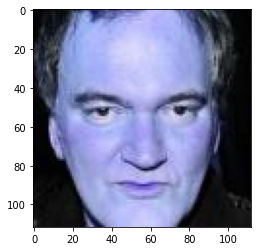

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img)

We are now ready to use our model! The only thing that we have to do is to pass the image through the model. Note that there are standard data types supported by OpenDR. However, OpenDR also understands common data types (e.g,. OpenCV images) and automatically converts them into the most appropriate format:

In [26]:
results = recognizer.infer(img)

In [27]:
print(f"Found person {results.description} with confidence {results.confidence}")

Found person Quentin Tarantino with confidence 0.8952081194147468


As we can see, the inference algorithm ran correctly and returned an ID of the person in the image and the corresponding confidence.